# deepQ
- Sara Echeverría 21371
- Ricardo Mendez 21289
- Melissa Pérez 21385

Repository link: https://github.com/bl33h/deepQ

## Task 1

In [10]:
import torch
import numpy as np
import torch.nn as nn
import gymnasium as gym
import torch.optim as optim
from collections import deque
import matplotlib.pyplot as plt

In [11]:
# define the dql neural network model
class DQL(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQL, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # first hidden layer
        self.fc2 = nn.Linear(128, 128)        # second hidden layer
        self.fc3 = nn.Linear(128, output_dim) # output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # relu activation on the first layer
        x = torch.relu(self.fc2(x))  # relu activation on the second layer
        return self.fc3(x)           # output layer, no activation due to q-value output

In [12]:
# initialize the environment
env = gym.make('CartPole-v1')

In [13]:
# hyperparameters
gamma = 0.99  # discount factor
epsilon = 1.0  # initial exploration rate
epsilonDecay = 0.995  # epsilon decay per episode
epsilonMin = 0.01  # minimum epsilon
learningRate = 0.001  # learning rate
batchSize = 64  # batch size for experience replay
memorySize = 10000  # memory capacity
targetUpdateFreq = 100  # target network update frequency
numEpisodes = 500

In [14]:
# initialize the network and optimizer
inputDim = env.observation_space.shape[0]
outputDim = env.action_space.n
policyNet = DQL(inputDim, outputDim)
targetNet = DQL(inputDim, outputDim)
targetNet.load_state_dict(policyNet.state_dict())
targetNet.eval()  # set target network to evaluation mode
optimizer = optim.Adam(policyNet.parameters(), lr=learningRate)

In [15]:
# memory for experience replay
memory = deque(maxlen=memorySize)

# function to choose an action based on epsilon-greedy approach
def selectAction(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # explore: select a random action
    else:
        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            return policyNet(state).max(1)[1].view(1, 1).item()  # exploit: select the best action based on the current policy

In [16]:
# reward history
totalRewards = []

# training loop with rendering
for episode in range(numEpisodes):
    state = env.reset()
    totalReward = 0
    done = False
    
    while not done:
        
        # render the environment
        # env.render()
        
        action = selectAction(state, epsilon)
        
        # unpack with the additional boolean
        nextState, reward, done, _, _ = env.step(action)

        memory.append((state, action, reward, nextState, done))
        state = nextState
        totalReward += reward
    
    totalRewards.append(totalReward)

    print(f"Episode {episode}: Total reward = {totalReward}")

# cleanup
env.close()

Episode 0: Total reward = 16.0
Episode 1: Total reward = 39.0
Episode 2: Total reward = 28.0
Episode 3: Total reward = 29.0
Episode 4: Total reward = 13.0
Episode 5: Total reward = 39.0
Episode 6: Total reward = 28.0
Episode 7: Total reward = 11.0
Episode 8: Total reward = 11.0
Episode 9: Total reward = 38.0
Episode 10: Total reward = 11.0
Episode 11: Total reward = 25.0
Episode 12: Total reward = 29.0
Episode 13: Total reward = 19.0
Episode 14: Total reward = 19.0
Episode 15: Total reward = 13.0
Episode 16: Total reward = 22.0
Episode 17: Total reward = 12.0
Episode 18: Total reward = 24.0
Episode 19: Total reward = 13.0
Episode 20: Total reward = 105.0
Episode 21: Total reward = 32.0
Episode 22: Total reward = 12.0
Episode 23: Total reward = 40.0
Episode 24: Total reward = 12.0
Episode 25: Total reward = 30.0
Episode 26: Total reward = 12.0
Episode 27: Total reward = 22.0
Episode 28: Total reward = 14.0
Episode 29: Total reward = 11.0
Episode 30: Total reward = 16.0
Episode 31: Total

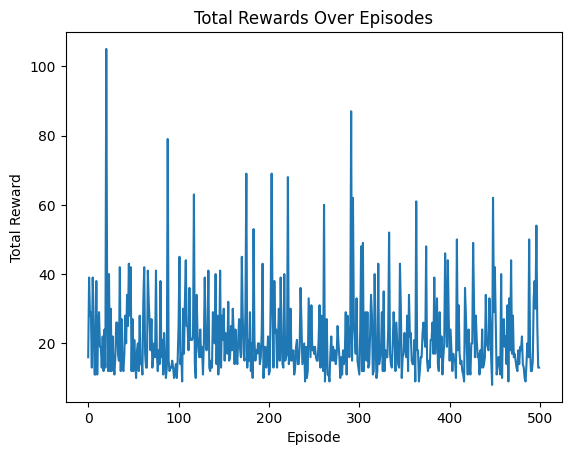

In [17]:
# Plot the total rewards over episodes
plt.plot(totalRewards)
plt.title('Total Rewards Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

In [18]:
# evaluate the agent
def evaluateAgent(env, policyNet, numTrials=10):
    totalRewards = []
    
    for trial in range(numTrials):
        state, _ = env.reset()
        state = np.array(state)
        
        totalReward = 0
        done = False
        
        while not done:
            # Select the best action (no exploration)
            stateTensor = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                action = policyNet(stateTensor).max(1)[1].view(1, 1).item()
            
            # Execute the action
            nextState, reward, done, _, _ = env.step(action)
            
            # Update the current state
            state = np.array(nextState)
            
            # Accumulate the total reward
            totalReward += reward
        
        totalRewards.append(totalReward)
        print(f"Trial {trial + 1}: Total reward = {totalReward}")
    
    avgReward = np.mean(totalRewards)
    print(f"\nAverage reward over {numTrials} trials: {avgReward}")
    return avgReward

# Evaluate the agent after training
evaluateAgent(env, policyNet, numTrials=10)

Trial 1: Total reward = 16.0
Trial 2: Total reward = 16.0
Trial 3: Total reward = 16.0
Trial 4: Total reward = 19.0
Trial 5: Total reward = 15.0
Trial 6: Total reward = 17.0
Trial 7: Total reward = 18.0
Trial 8: Total reward = 13.0
Trial 9: Total reward = 20.0
Trial 10: Total reward = 19.0

Average reward over 10 trials: 16.9


np.float64(16.9)

## Task 2

Defina en qué consiste y en qué clase de problemas se pueden usar cada uno de los siguientes acercamientos en Deep Reinforcement Learning

1. Proximal Policy Optimization: Este algoritmo controla las políticas para mejorar la estabilidad del training al utilizar un mecanismo de recorte para prevenir actualizaciones excesivas. Se puede utilizar en:
    - Videojuegos con entornos complejos que requieren decisiones rápidas
    - Entrenamientos y pruebas en entornos simulados
    - Optimización de recursos en tiempo real

2. Deep Deterministic Policy Gradients (DDPG)
    - DDPG es un algoritmo de aprendizaje por refuerzo profundo diseñado para problemas de control continuo. Combina ideas de Actor-Critic y funciona con políticas determinísticas, donde la red Actor selecciona acciones y la red Crítico evalúa su calidad.
    - Se aplica a problemas con acciones continuas, como la manipulación robótica, el control de vehículos autónomos, o simulaciones físicas.

3. Trust Region Policy Optimization (TRPO)
    - TRPO es un algoritmo de optimización de políticas que asegura actualizaciones estables al limitar los cambios bruscos mediante una restricción en la divergencia Kullback-Leibler, optimizando directamente la política estocástica.
    - Se utiliza en problemas de larga duración con acciones discretas o continuas, donde se requiere una optimización estable, como en juegos complejos o simulaciones.

4. Asynchronous Advantage Actor-Critic (A3C): Por su parte,  optimiza las políticas de control mediante la descomposición en múltiples agentes que aprenden de manera simultánea y asincrónica. Es decir, que utiliza tanto un "actor", que sugiere acciones, como un "crítico", que evalúa  basándose en la función de valor. Se puede utilizar en:
    - Sistemas de recomendación donde ajusta y mejora las sugerencias
    - Coordinación de tareas complejas con precisión en la robótica
    - Simulaciones ambientales, para modelar y optimizar procesos en entornos dinámicos